In [ ]:
# Install necessary libraries
!pip install numpy-financial

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import numpy_financial as npf

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update path if necessary)
data = pd.read_csv('/content/LoanData_Bondora.csv', na_values=['n/a'])

# Selecting relevant features and target



<ipython-input-2-c4610c2daceb>:15: DtypeWarning: Columns (34,38,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/LoanData_Bondora.csv', na_values=['n/a'])


In [ ]:
data.columns.tolist()

['ReportAsOfEOD',
 'LoanId',
 'LoanNumber',
 'ListedOnUTC',
 'BiddingStartedOn',
 'BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'UserName',
 'NewCreditCustomer',
 'LoanApplicationStartedDate',
 'LoanDate',
 'ContractEndDate',
 'FirstPaymentDate',
 'MaturityDate_Original',
 'MaturityDate_Last',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'VerificationType',
 'LanguageCode',
 'Age',
 'DateOfBirth',
 'Gender',
 'Country',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'County',
 'City',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'NrOfDependants',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'EmploymentPosition',
 'WorkExperience',
 'OccupationArea',
 'HomeOwnershipType',
 'IncomeFromPrincipalEmployer',
 'IncomeFromPension',
 'IncomeFromFamilyAllowance',
 'IncomeFromSocialWelfare',
 'IncomeFromLeavePay',
 'IncomeFromChildSupport',
 'IncomeOther',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiab

In [ ]:
# Display basic information
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179235 entries, 0 to 179234
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(62), int64(12), object(35)
memory usage: 149.6+ MB
None
         LoanNumber  BidsPortfolioManager        BidsApi     BidsManual  \
count  1.792350e+05         179235.000000  179235.000000  179235.000000   
mean   1.239306e+06            797.962530      27.432337     499.544776   
std    6.610266e+05           1235.509764     147.568318     714.723996   
min    3.700000e+01              0.000000       0.000000       0.000000   
25%    7.125380e+05            105.000000       0.000000      50.000000   
50%    1.096557e+06            336.000000       0.000000     258.000000   
75%    1.851458e+06            960.000000       4.000000     639.116700   
max    2.313298e+06          10625.000000    7570.000000   10630.000000   

       ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
count          17923

In [ ]:
data['Status']

,Status
0,Late
1,Late
2,Repaid
3,Late
4,Late
...,...
179230,Late
179231,Repaid
179232,Repaid
179233,Repaid


In [ ]:
data['Status']=data['Status'].apply(lambda x:'Non default' if 'Repaid' in x else 'Defaulted')
data['Status']

,Status
0,Defaulted
1,Defaulted
2,Non default
3,Defaulted
4,Defaulted
...,...
179230,Defaulted
179231,Non default
179232,Non default
179233,Non default


In [ ]:
# Define the target variable as 'Status' and the selected features that impact loan repayment
target = data['Status']  # Assuming 'Status' indicates loan outcome
features = data[['Amount', 'Interest', 'PrincipalPaymentsMade', 'InterestAndPenaltyDebtServicingCost',
                 'PrincipalDebtServicingCost', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
                 'IncomeTotal', 'LiabilitiesTotal']]


In [ ]:
# Drop rows where 'Status' is missing
data = data.dropna(subset=['Status'])

# Fill missing values in features with the median
features = features.fillna(features.median())

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred, target_names=label_encoder.classes_))

Random Forest Model Accuracy: 98.13%

Classification Report:
              precision    recall  f1-score   support

   Defaulted       0.99      0.98      0.99     25312
 Non default       0.96      0.98      0.97     10535

    accuracy                           0.98     35847
   macro avg       0.98      0.98      0.98     35847
weighted avg       0.98      0.98      0.98     35847



Accuracy: 0.98
Model Accuracy: 98.13%


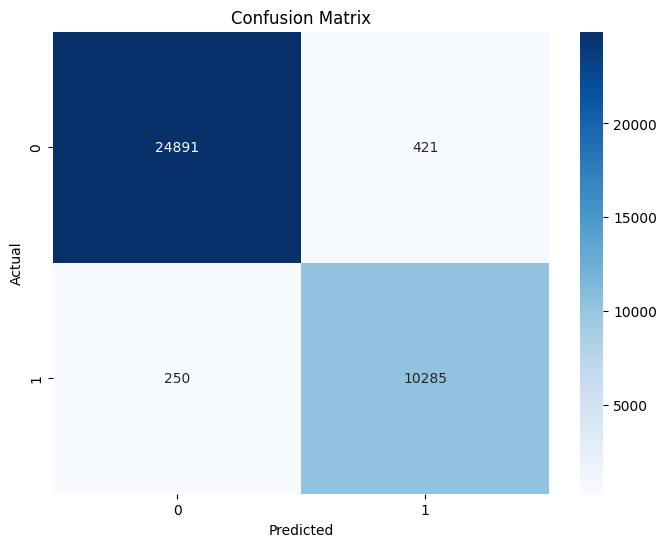

In [ ]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define functions to calculate IRR and ERR
def calculate_irr(principal, cash_flows, recovery_amount=0):
    # Adjust the cash flow sequence to include recovery if defaulted
    if recovery_amount > 0:
        cash_flows[-1] += recovery_amount
    # Calculate IRR; npf.irr expects a list of cash flows starting with the initial negative investment
    irr = npf.irr([-principal] + cash_flows)
    return irr * 12  # Annualize IRR

def calculate_err(principal, cash_flows, term, risk_free_rate=0.01, recovery_amount=0, default_occurred=False):
    FV = 0  # Initialize future value at term end
    for i, cash_flow in enumerate(cash_flows):
        # Calculate future value by reinvesting each cash flow at the risk-free rate until end of term
        if cash_flow != 0:
            FV += cash_flow * np.prod([1 + risk_free_rate / 12 for _ in range(i+1, term)])
    if default_occurred:
        FV += recovery_amount  # Add recovery amount if defaulted
    # Calculate ERR
    err = (FV / principal) ** (12 / term) - 1
    return err

# Generate IRR and ERR for each loan based on cash flows and term
data['IRR'] = data.apply(lambda row: calculate_irr(row['Amount'], [row['PrincipalPaymentsMade']], row.get('RecoveryAmount', 0)), axis=1)
data['ERR'] = data.apply(lambda row: calculate_err(row['Amount'], [row['PrincipalPaymentsMade']], term=36, risk_free_rate=0.01, recovery_amount=row.get('RecoveryAmount', 0), default_occurred=row['Status'] == 'Defaulted'), axis=1)

# Identify top 20 loans by ERR
top_loans_by_err = data.nlargest(20, 'ERR')
print("Top 20 Loans by ERR:")
print(top_loans_by_err[['Amount', 'IRR', 'ERR']])

Top 20 Loans by ERR:
          Amount       IRR       ERR
2158    447.3996  0.917301  0.034866
25496   530.0000  0.267396  0.017211
3817   1050.0000  0.030514  0.010621
3055    900.0000  0.026267  0.010502
4035    700.0000  0.021771  0.010376
1666    249.2513  0.000000  0.009766
7      1000.0000  0.000000  0.009766
8      4000.0000  0.000000  0.009766
9      5000.0000  0.000000  0.009766
10     2000.0000  0.000000  0.009766
11      530.0000  0.000000  0.009766
12     5500.0000  0.000000  0.009766
13     6900.0000  0.000000  0.009766
16      530.0000  0.000000  0.009766
18     3720.0000  0.000000  0.009766
28     1595.0000  0.000000  0.009766
29     1500.0000  0.000000  0.009766
33     1000.0000  0.000000  0.009766
36     4785.0000  0.000000  0.009766
39      500.0000  0.000000  0.009766


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

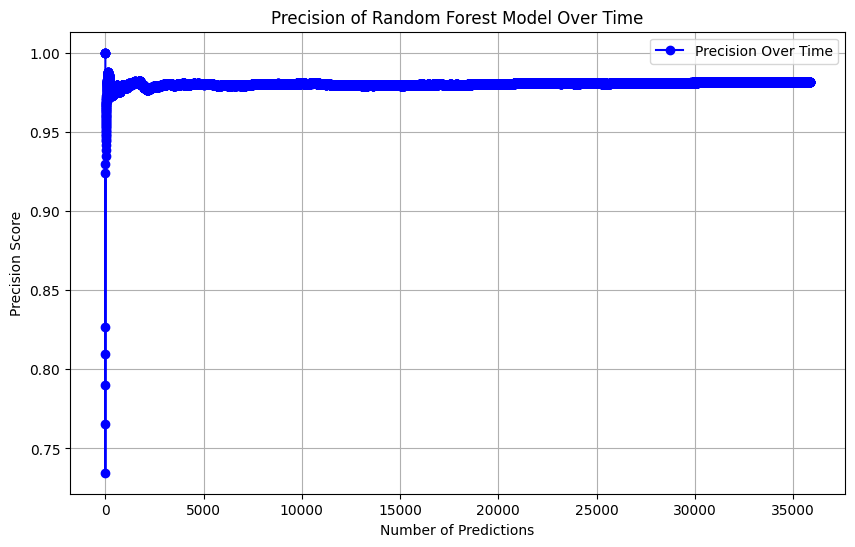

In [ ]:
# Calculate precision over time
from sklearn.metrics import precision_score

# Initialize list to store precision at each step
precision_scores = []
interval = 10

# Iterate over a range to simulate time-series precision measurement
for i in range(1, len(y_test)):
    # Calculate precision for the subset of predictions up to index i
    precision = precision_score(y_test[:i], rf_y_pred[:i], average='weighted')
    precision_scores.append(precision)

# Plot precision over time
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(y_test)), precision_scores, marker='o', color='b', label="Precision Over Time")
plt.xlabel("Number of Predictions")
plt.ylabel("Precision Score")
plt.title("Precision of Random Forest Model Over Time")
plt.legend()
plt.grid(True)
plt.show()
